<a href="https://colab.research.google.com/github/SaiPranay04/German-Traffic-Sign-Recognition/blob/main/Traffic_sign_german.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTING ALL THE NECCESARY LIBRARIES
import numpy as np
import pandas as pd
import os
import cv2
import zipfile
import warnings
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
import seaborn as sns # Import Seaborn
import matplotlib.pyplot as plt

# Use Seaborn to set the Matplotlib style
sns.set_style('darkgrid')  # Use 'darkgrid' or another Seaborn style
# You can alternatively specify the older style name:
# plt.style.use('seaborn-v0_8-darkgrid')
warnings.filterwarnings("ignore")
np.random.seed(42)

In [ ]:
def read_images(directory_path):
    images = []
    labels = []

    valid_extensions = ('.jpg', '.jpeg', '.png')  # Valid image file extensions

    # Get subdirectories within the directory
    subdirectories = [subdir for subdir in os.listdir(directory_path) if os.path.isdir(os.path.join(directory_path, subdir))]

    for subdir in subdirectories:
        subdirectory_path = os.path.join(directory_path, subdir)
        if not os.listdir(subdirectory_path):
            continue  # Skip empty subdirectories
        for filename in os.listdir(subdirectory_path):
            if filename.lower().endswith(valid_extensions):  # Check if the file has a valid image extension
                image_path = os.path.join(subdirectory_path, filename)
                image = cv2.imread(image_path)

                # Ensure all images are resized to the same shape (30, 30, 3)
                # If the image is grayscale, convert it to RGB
                if len(image.shape) == 2:  # Grayscale image
                    image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
                image = cv2.resize(image, (30, 30))

                images.append(image)

                # Assign the label based on the subdirectory name
                label = int(subdir)
                labels.append(label)

    data = np.array(list(zip(images, labels)), dtype=object) # Changed to dtype=object to handle the varying shapes

    return data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive') # Use drive.mount instead of drive._mount

Mounted at /content/gdrive


In [ ]:
!unzip /content/gdrive/MyDrive/german.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/5/00005_00053_00010.png  
  inflating: train/5/00005_00053_00011.png  
  inflating: train/5/00005_00053_00012.png  
  inflating: train/5/00005_00053_00013.png  
  inflating: train/5/00005_00053_00014.png  
  inflating: train/5/00005_00053_00015.png  
  inflating: train/5/00005_00053_00016.png  
  inflating: train/5/00005_00053_00017.png  
  inflating: train/5/00005_00053_00018.png  
  inflating: train/5/00005_00053_00019.png  
  inflating: train/5/00005_00053_00020.png  
  inflating: train/5/00005_00053_00021.png  
  inflating: train/5/00005_00053_00022.png  
  inflating: train/5/00005_00053_00023.png  
  inflating: train/5/00005_00053_00024.png  
  inflating: train/5/00005_00053_00025.png  
  inflating: train/5/00005_00053_00026.png  
  inflating: train/5/00005_00053_00027.png  
  inflating: train/5/00005_00053_00028.png  
  inflating: train/5/00005_00053_00029.png  
  inflating: train/5/00005_00054_00000.png  
  in

In [ ]:
train_data = read_images('/content/train')

In [ ]:
print(f"Train Data Shape : {train_data.shape}")

Train Data Shape : (39209, 2)


In [ ]:
classes={0:'Speed limit(20km/hr)',
         1:'Speed limit(30km/hr)',
         2:'Speed limit(50km/hr)',
         3:'Speed limit(60km/hr)',
         4:'Speed limit(70km/hr)',
         5:'Speed limit(80km/hr)',
         6:'End of speed limt(80km/hr)',
         7:'Speed limit(100km/hr)',
         8:'Speed limit(120km/hr)',
         9:'No passing',
         10:'No passing vehicles over 3.5 tons',
         11:'Right- of- way at inetersection',
         12:'Priority road',
         13:'Yield',
         14:'Stop',
         15:'No vehicles',
         16:'Vehicles greater than 3.5 tons prohibited',
         17:'No entry',
         18:'General Caution',19:'Dangers curve left',
         20:'Dangers curve Right',
         21:'Double curve',
         22:'Bumpy road',
         23:'Slippery road',
         24:'Road narrows on the right',
         25:'Road work',
         26:'Traffic signals',
         27:'Pedestrians',
         28:'Children crossing ',
         29:'Bicycle crossing',
         30:'Beware of ice/snow',
         31:'Wild animal crossing',
         32:'End speed + passing limits',
         33:'Turn right ahead',
         34:' Turn left ahead',
         35:'Ahead only',
         36:'Go straight or right',
         37:'Go straight or left',
         38:'Keep right',39:'Kepp left',
         40:'Rounabout mandatory',
         41:'End of no passing',
         42:'End of no passingVehicle greater than 3.5tons'
        }


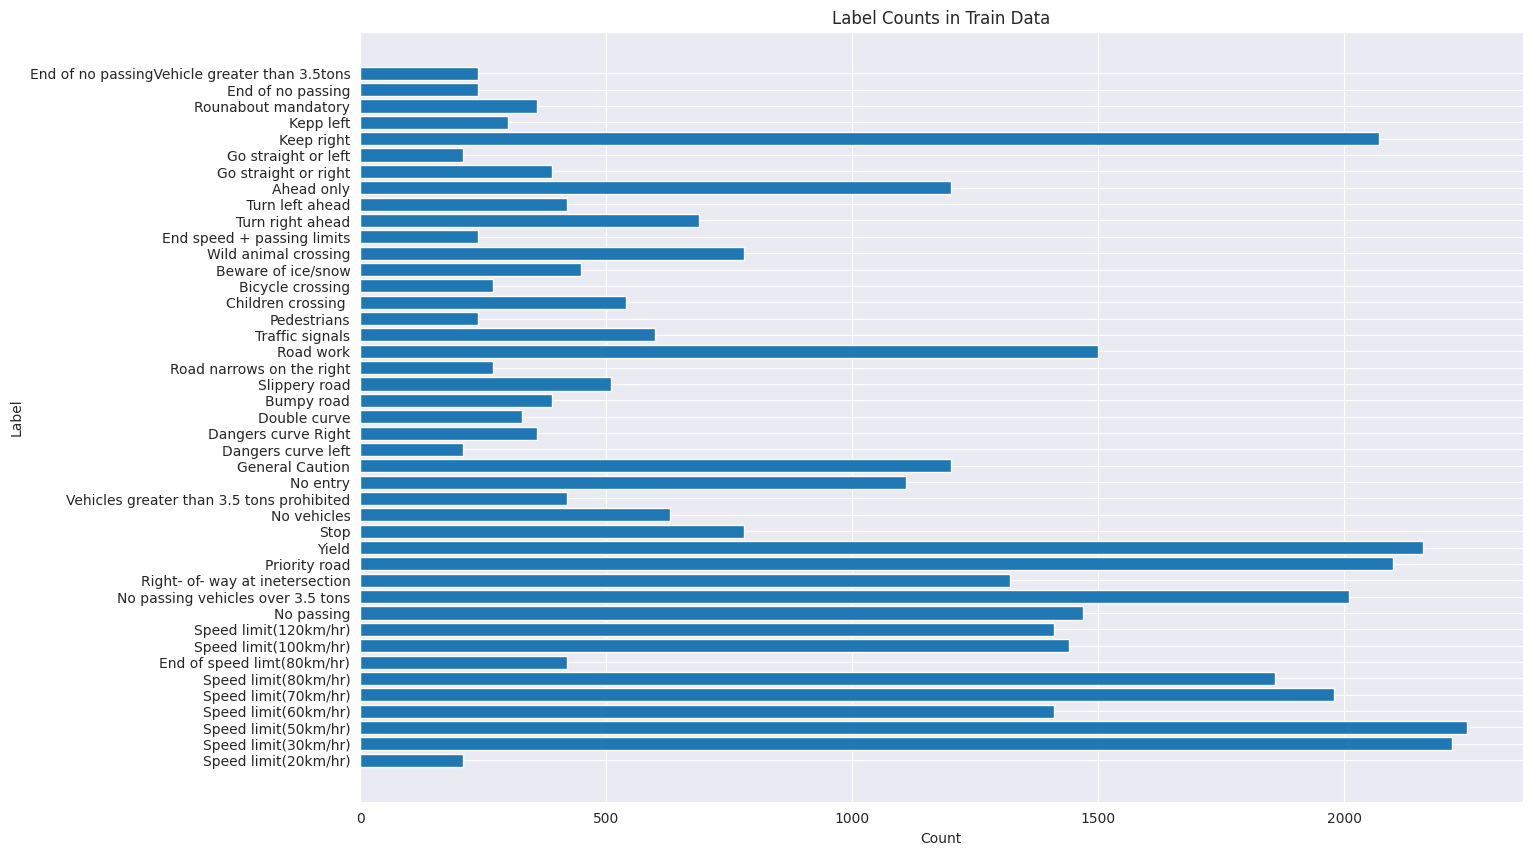

In [ ]:
labels = train_data[:, 1].astype(int)

# Get the unique labels and their counts
unique_labels, label_counts = np.unique(labels, return_counts=True)

# Create a horizontal bar plot
plt.figure(figsize=(15,10))
plt.barh(unique_labels, label_counts)
plt.xlabel('Count')
plt.ylabel('Label')
plt.title('Label Counts in Train Data')
plt.yticks(unique_labels, [classes[label] for label in unique_labels])
plt.show()

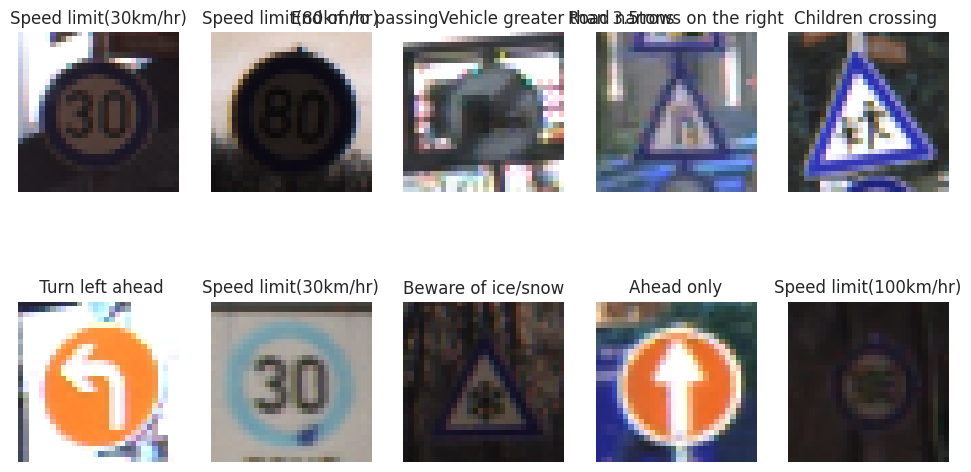

In [ ]:
# Select 10 random samples from train_data
indices = np.random.choice(train_data.shape[0], size=10, replace=False)
samples = train_data[indices]

# Create a grid of subplots for the images
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
fig.subplots_adjust(hspace=0.4)

for i, (image, label) in enumerate(samples):
    ax = axes[i // 5, i % 5]
    ax.imshow(image)
    ax.set_title(classes[label])
    ax.axis('off')

plt.show()

In [ ]:
shuffled_train = train_data.copy()  # Create a copy of train_data to avoid modifying the original array
shuffled_train = np.array(shuffled_train)  # Shuffle the array randomly

In [ ]:
train_set, test_set = train_test_split(shuffled_train, test_size=0.2, random_state=42)

# Separate the input (X) and output/label (y) arrays from the training set
x_train = train_set[:, 0]
y_train = train_set[:, 1]

# Separate the input (X) and output/label (y) arrays from the testing set
x_test = test_set[:, 0]
y_test = test_set[:, 1]

# Convert the data type of the arrays to int
x_train = np.array([np.array(x) for x in x_train])
y_train = np.array([np.array(y) for y in y_train])
x_test = np.array([np.array(x) for x in x_test])
y_test = np.array([np.array(y) for y in y_test])
x_train = x_train / 255.0
x_test = x_test / 255.0
print("x_train.shape:", x_train.shape)
print("x_test.shape:", x_test.shape)
print("y_train.shape:", y_train.shape)
print("y_test.shape:", y_test.shape)

x_train.shape: (31367, 30, 30, 3)
x_test.shape: (7842, 30, 30, 3)
y_train.shape: (31367,)
y_test.shape: (7842,)


In [ ]:
y_train = to_categorical(y_train, num_classes=43)
y_test = to_categorical(y_test, num_classes=43)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(30,30,3)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.BatchNormalization(axis=-1),

    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.BatchNormalization(axis=-1), tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.5),

    tf.keras.layers.Dense(43, activation='softmax')
])

In [ ]:
lr = 0.001
epochs = 30

opt = Adam(learning_rate=lr)  # Set the learning_rate instead of decay
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

aug = ImageDataGenerator(
    rotation_range=15,
    zoom_range=0.2,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode="reflect"
)

In [ ]:
history = model.fit(aug.flow(x_train,y_train, batch_size=32), epochs=epochs, validation_data=(x_test,y_test))

Epoch 1/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 138s 132ms/step - accuracy: 0.2510 - loss: 3.0709 - val_accuracy: 0.6645 - val_loss: 0.9788
Epoch 2/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 140s 131ms/step - accuracy: 0.6389 - loss: 1.1306 - val_accuracy: 0.8614 - val_loss: 0.3844
Epoch 3/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 127s 129ms/step - accuracy: 0.7859 - loss: 0.6666 - val_accuracy: 0.9176 - val_loss: 0.2334
Epoch 4/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 141s 128ms/step - accuracy: 0.8378 - loss: 0.4924 - val_accuracy: 0.9332 - val_loss: 0.1842
Epoch 5/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 143s 129ms/step - accuracy: 0.8714 - loss: 0.3927 - val_accuracy: 0.9282 - val_loss: 0.2071
Epoch 6/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 123s 125ms/step - accuracy: 0.8871 - loss: 0.3447 - val_accuracy: 0.9489 - val_loss: 0.1451
Epoch 7/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 145s 128ms/step - accuracy: 0.8882 - loss: 0.3398 - val_accuracy: 0.9561 - val_loss: 0.1262
Epoch 8/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 140s 127ms/step - accuracy: 0.9051 -

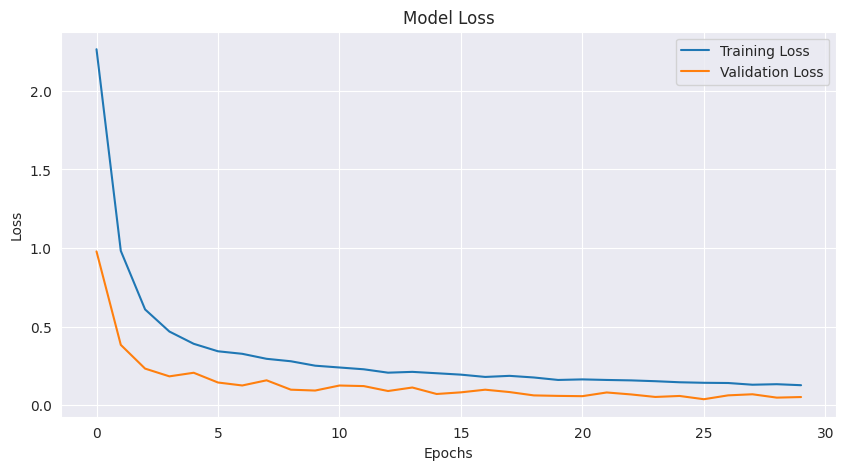

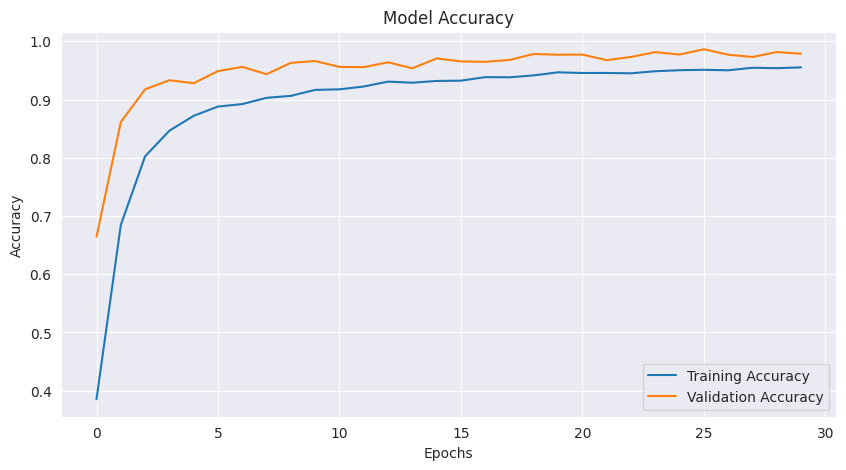

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Convert NumPy array to DataFrame
shuffled_train_dataframe = pd.DataFrame(shuffled_train)
# Save DataFrame as CSV file
shuffled_train_dataframe.to_csv('data.csv', index=False)

In [ ]:
model.save("saved_model.h5")

In [ ]:
def predict_image(model_path, image_path):
    # Load the model
    model = tf.keras.models.load_model(model_path)

    # Load and preprocess the image
    image = cv2.imread(image_path)
    image = cv2.resize(image, (30, 30))
    image = np.expand_dims(image, axis=0)
    image = image / 255.0

    # Make predictions
    predictions = model.predict(image)
    predicted_label = np.argmax(predictions)

    return predicted_label

model_path = "/content/saved_model.h5"
image_path = "/content/test/00002.png"

predicted = predict_image(model_path, image_path)
print("Predicted Label:", classes[predicted])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
Predicted Label: Keep right


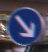

In [ ]:
#Accecsing one image
from PIL import Image
img = Image.open('/content/test/00002.png')
img

In [ ]:
#Accecsing one image
from PIL import Image
img = Image.open('/content/Test/00015.png')
img

In [ ]:
model_path = "/content/saved_model.h5"
image_path = "/content/Test/00015.png"

predicted = predict_image(model_path, image_path)
print("Predicted Label:", classes[predicted])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
Predicted Label: No passing
